In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plot

In [3]:
import seaborn as sns

In [4]:
import pandas as pd

In [5]:
d1 = np.loadtxt("resources/1D/example_1.txt")

In [6]:
d2 = np.loadtxt("resources/1D/example_2.txt")

In [8]:
print(d1.shape, d2.shape)

(500,) (500,)


In [9]:
# histogram plots

(array([ 40.,  80., 180.,  75.,  68.,  34.,  13.,   7.,   1.,   2.]),
 array([ 0.568 ,  2.8419,  5.1158,  7.3897,  9.6636, 11.9375, 14.2114,
        16.4853, 18.7592, 21.0331, 23.307 ]),
 <a list of 10 Patch objects>)

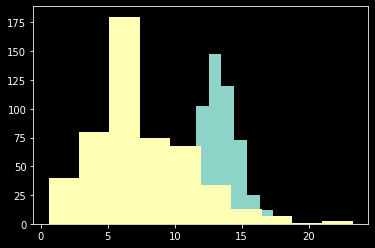

In [11]:
plot.hist(d1, label="D1")
plot.hist(d2, label="D2")

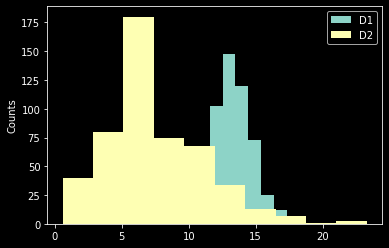

In [14]:
plot.hist(d1, label="D1")
plot.hist(d2, label="D2")
plot.legend()
plot.ylabel("Counts"); # semicolon suppresses the output of the last thing

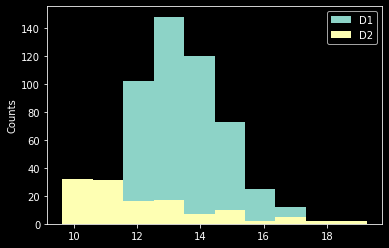

In [15]:
counts1, bins, _ = plot.hist(d1, bins=10, label="D1") # can get the counts, bins, patches like this (patches is surpressed here)
plot.hist(d2, bins = bins, label="D2")
plot.legend()
plot.ylabel("Counts"); # semicolon suppresses the output of the last thing

In [16]:
# but the problem is that the axis isn't scaled correctly

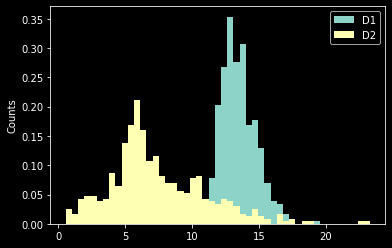

In [18]:
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
plot.hist(d1, bins = bins, label="D1", density = True) # density=true normalizes it to 1
plot.hist(d2, bins = bins, label="D2", density = True)
plot.legend()
plot.ylabel("Counts"); # semicolon suppresses the output of the last thing

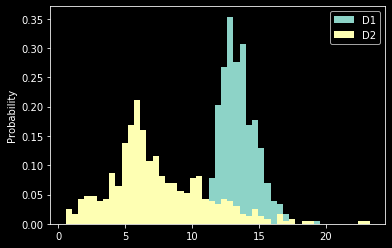

In [19]:
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
plot.hist(d1, bins = bins, label="D1", density = True) # density=true normalizes it to 1
plot.hist(d2, bins = bins, label="D2", density = True)
plot.legend()
plot.ylabel("Probability"); # semicolon suppresses the output of the last thing

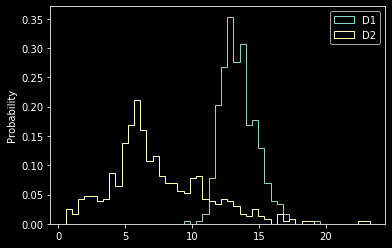

In [20]:
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
plot.hist(d1, bins = bins, label="D1", density = True, histtype="step") # some more plotting options
plot.hist(d2, bins = bins, label="D2", density = True, histtype="step")
plot.legend()
plot.ylabel("Probability"); # semicolon suppresses the output of the last thing

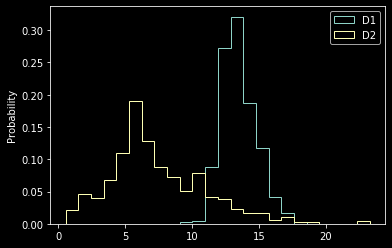

In [21]:
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 25)
plot.hist(d1, bins = bins, label="D1", density = True, histtype="step") # some more plotting options
plot.hist(d2, bins = bins, label="D2", density = True, histtype="step")
plot.legend()
plot.ylabel("Probability"); # semicolon suppresses the output of the last thing

In [22]:
# you don't actually have to have all that fancy bin code as long as you have density = True

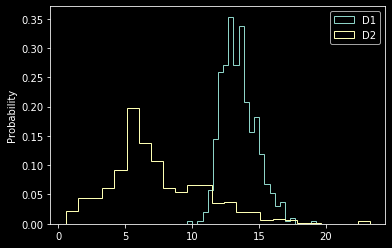

In [23]:
bins = 25
plot.hist(d1, bins = bins, label="D1", density = True, histtype="step") # some more plotting options
plot.hist(d2, bins = bins, label="D2", density = True, histtype="step")
plot.legend()
plot.ylabel("Probability"); # semicolon suppresses the output of the last thing

In [24]:
# the bins won't be the same size but since they are scaled the same the area under the curve still represents the correct qty/probability